# Clustering
When we deal with complex datasets of multiple observations and variables, it can be useful to be able to understand the underlying structure of the data. 

One approach to do so is to determine whether the data can be grouped into **clusters containing points with similar characteristics**. This can be useful in different application scenarios in data analysis:

1. **Customer Segmentation:**
   - Grouping customers based on their purchasing behavior, preferences, or demographics for targeted marketing strategies.

2. **Image Segmentation:**
   - Dividing an image into meaningful segments or regions based on similarity, aiding in object recognition and computer vision tasks.

3. **Text Document Clustering:**
   - Grouping similar documents together based on their content for tasks such as topic modeling, document organization, and information retrieval.

4. **Speech and Audio Processing:**
    - Clustering **audio data for tasks such as speaker identification, music genre classification, and speech analysis**.

5. **E-commerce:**
    - Grouping products or users based on purchasing patterns to optimize inventory management and improve the user experience.

## Problem Definition

Clustering aims to break the data into distinct group with similar properties. Let us consider the "Old Faithful" dataset, which comprises $272$ observations of the eruption of the Old Faithful geyser at the Yellowstone National Park in USA. Each observation includes two variables:
* The **duration** of the eruption in minutes;
* The time in minutes to the **next eruption**.

We can see each observation as 2D vector which can be plotted in a Cartesian coordinate system:

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_31588/1263664924.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='waiting', y='duration', data=df, palette='viridis', s=100)


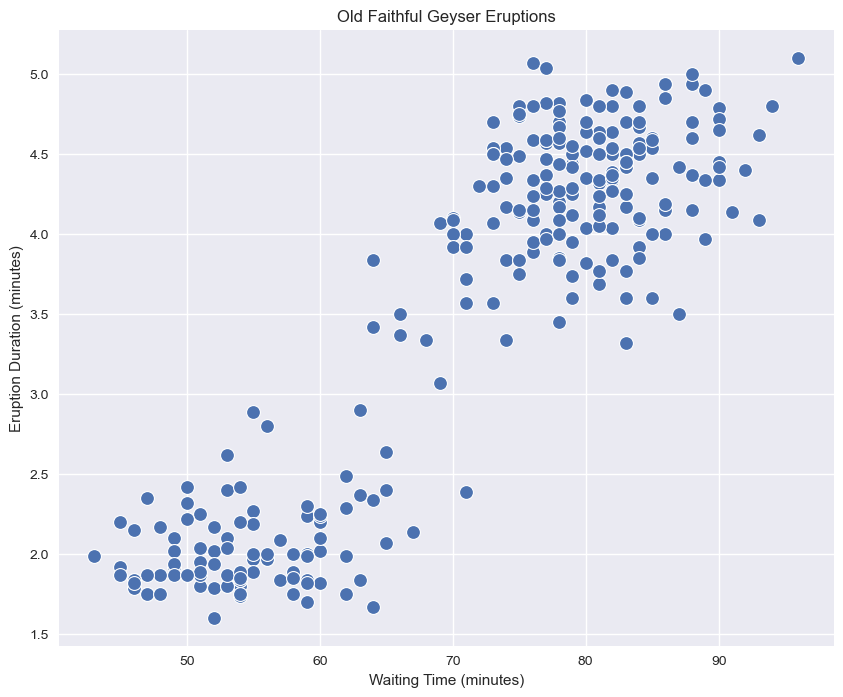

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Old Faithful dataset from seaborn
df = sns.load_dataset('geyser')

# Plotting the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='waiting', y='duration', data=df, palette='viridis', s=100)

# Adding labels and title
plt.title('Old Faithful Geyser Eruptions')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Eruption Duration (minutes)')

# Display the plot
plt.show()


We can see how we clearly have two kinds of eruptions:
* Short eruptions followed by other eruptions in a short time (bottom left);
* Long eruptions followed by other eruptions in a long time (upper right).

A clustering algorithm aims to automatically find the two groups and assign each data point to the most likely group. Note that the two groups will be referred generically as "cluster $i$", meaning that the algorithm will not assign any semantic meaning to the clusters, but it will aim to put "similar" data points in the same cluster.

Let

$$\mathbf{X} = \left\{ \mathbf{x}^{(i)} \right\}_{i = 1}^{N},\ \mathbf{x}^{(i)} \in \mathfrak{R}^{n}$$

be a set of observations. The goal of clustering is to split $\mathbf{X}$ into $K$ groups (called clusters):

$$S = \{ S_{1},S_{2},\ldots,S_{K}\}$$

Such that:

$$\forall\ \mathbf{x}^{(i)} \in \mathbf{X}\ \exists!S_{j} \in S\ :\mathbf{x}^{(i)} \in S_{j}$$

The clusters are expected to be such that elements within a group are
**similar to each other**, whereas elements belonging to different groups are
different from each other.

**The number of clusters** $\mathbf{K}$ **is often a hyper-parameter of
the algorithm.**

### Graphical Example
For instance, consider the following 2D points:


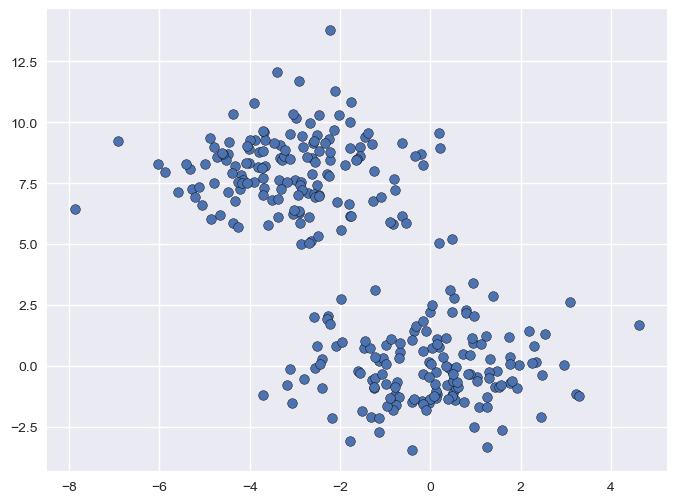

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
data, _ = make_blobs(n_samples=300,random_state=42,cluster_std=1.5, centers=[[-3,8],[0,0]])
#data = df[['waiting','duration']].values

# Plot the initial state
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], edgecolors='k')
plt.show()



Even if we the points are not explicitly assigned to given groups (i.e., we are not observing any discrete variable $y$ indicating the group to which each point belong), we can clearly
see that there are two distinct groups (the one in the top-left part of
the plot, and the one in bottom-right). The goal of clustering is to
split the data into two groups, as it is shown below:

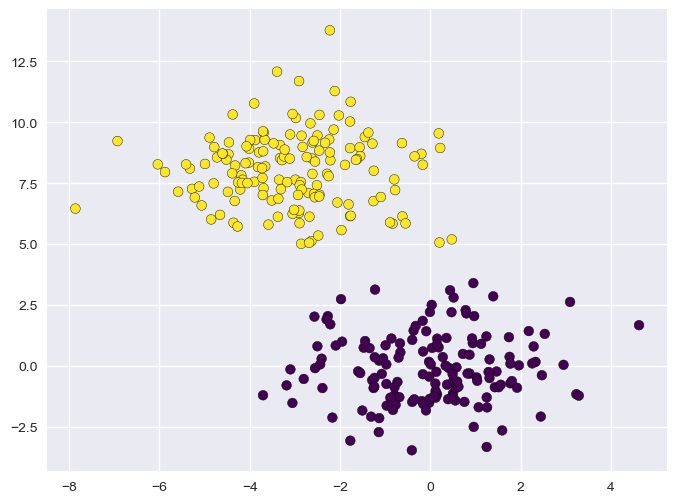

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1, random_state=42)
labels=kmeans.fit_predict(data)
# Plot the initial state
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.show()



Also note that, while different possible partitions of the
2D points are possible, the one outlined in the plot guarantees that points within
the same group are similar to one another (i.e., their Euclidean
distance is small), whereas points from different groups have are
dissimilar (i.e., their Euclidean distance is large).

## K-Means Clustering

K-Means is the most popular clustering algorithm. As in the definition we just gave of clustering, the goal of K-Means is to break the data

$$\mathbf{X} = \left\{ \mathbf{x}^{(i)} \right\}_{i = 1}^{N},\ \mathbf{x}^{(i)} \in \mathfrak{R}^{n}$$

into $K$ clusters

$$S = \{ S_{1},S_{2},\ldots,S_{K}\}$$

such that:

$$\forall\ \mathbf{x}^{(i)} \in \mathbf{X}\ \exists!S_{j} \in S\ :\mathbf{x}^{(i)} \in S_{j}$$

More specifically, K-Means attempts to create $K$ clusters which are **as compact as possible**, where $K$ is
a parameter specified by the user (its application may depend on the application).

We will start by defining $K$ different vectors $\mathbf{\mu}_k \in \Re^n$ which will act as prototypes for our clusters. We will shortly see that these vectors will be the cluster's centers.

Hence, we define $N \times K$ binary variables $r_{ij}$ which will allow us to establish a mapping between data points $\mathbf{x}^{(i)}$ and clusters $S_j$. In particular, we will define:

$$r_{ij} = \begin{cases}1 & \text{ if } \mathbf{x}^{(i)} \in S_j \\ 0 & \text{ otherwise} \end{cases} $$

The notion that **clusters should be as compact as possible** is formalized by defining the following **cost function**, which is sometimes called also **distortion function**:

$$J = \sum_{j=1}^K \sum_{i=1}^N r_{ij} ||\mathbf{x}_i-\mathbf{\mu}_j||^2$$

Note that this function $J$ is the total **Within-Cluster Sum of Squares (WCSS)**.

For a single cluster $S_j$, the term $\sum_{i=1}^N r_{ij} ||\mathbf{x}_i-\mathbf{\mu}_j||^2$ is the sum of squared distances of all points in that cluster from its center. This is a measure of the cluster's **inertia** or "compactness."

The goal of K-Means is to find the set of centroids $\{\mathbf{\mu}_j\}$ and assignments $\{r_{ij}\}$ that minimizes this total inertia $J$.
 
The K-Means problem is solved by finding a partition  $\widehat{S}$ minimizing the cost function:

$$\{\hat r_{ij}\}_{ij}, \{ \hat{\mathbf{\mu}_j} \}_j = \arg{\min{\sum_{j = 1}^{K}{\sum_{i = 1}^{N}{r_{ij}\left\| \mathbf{x}^{(i)} - \mathbf{\mu}_{i} \right\|^{2}}}}}$$

### Optimization 

The minimization above can be performed using an iterative algorithm.
The first step of the algorithm is to choose $K$ random centroids
$\mathbf{\mu}_{i}$. After this initialization, the algorithm iterates
the following two steps:

>**Assignment**
>
>Eeach element $\mathbf{x}$ is assigned to the set
>    with the closest centroid
>
> $$r_{ij} = \begin{cases}1 & \text{ if } j=\arg_k\min ||\mathbf{x}^{(i)}-\mathbf{\mu}_j||^2 \\ 0 & \text{otherwise} \end{cases}, \forall i,j$$
>
>Which will lead to the partition:
>
>$$S_{i} = \left\{ \mathbf{x} \in \mathbf{X} :\ \left\| \mathbf{x} - \mathbf{\mu}_{i} \right\|^{2} \leq \left\| \mathbf{x} - \mathbf{\mu}_{j} \right\|^{2}\ \ \forall\ j \in \left\{ 1,\ldots K \right\} \right\}$$

>**Update**
>
>The centroids $\mathbf{\mu}_{i}$ are re-computed from
    the assigned sets
>
>$$\mathbf{\mu}_{j} = \frac{1}{|S_{j}|}\sum_{\mathbf{x} \in S_{j}}^{}\mathbf{x} = \frac{\sum_{i = 1}^{N}{r_{ij}\mathbf{x}^{(i)}}}{\sum_{i = 1}^{N}{r_{ij}}}$$

The algorithm converges when the update does not change any centroid. In
some cases, the algorithms may never actually converge, hence it is
often common to introduce as a termination criterion a maximum number of
iterations.

*The algorithm is not guaranteed to find the global optimum and the
solution reached may depend on the random initialization. However, in
practice it usually leads to a reasonable solution.*

### Pseudocode

We can see the optimization algorithm in pseudo-code as follows:

> Randomly initialize $K$ cluster centroids $\mu_{1},\mu_{2},\ldots,\mu_{K} \in \mathfrak{R}^{n}$
> 
> Repeat until termination criterion is reached {
>    
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for i = 1 to N
>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $r_{ij} = \begin{cases}1 & \text{ if } j=\arg_j\min ||\mathbf{x}^{(i)}-\mathbf{\mu}_j||^2 \\ 0 & \text{otherwise} \end{cases}, \forall i,j$ //assignment
>    
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for j = 1 to K
>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mathbf{\mu}_{j} = \frac{\sum_{i = 1}^{N}{r_{ij}\mathbf{x}^{(i)}}}{\sum_{i = 1}^{N}{r_{ij}}}$ //update
>
> }

### Example Execution

Let us see a graphical example of the process.

**Dataset**

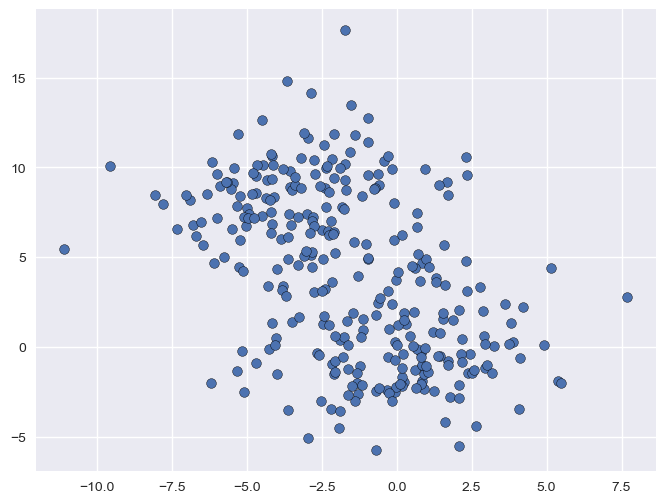

In [ ]:
# Generate synthetic data
data, _ = make_blobs(n_samples=300,random_state=42,cluster_std=2.5, centers=[[-3,8],[0,0]])

# Plot the initial state
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], edgecolors='k')
plt.show()


**Initialization (Random)**

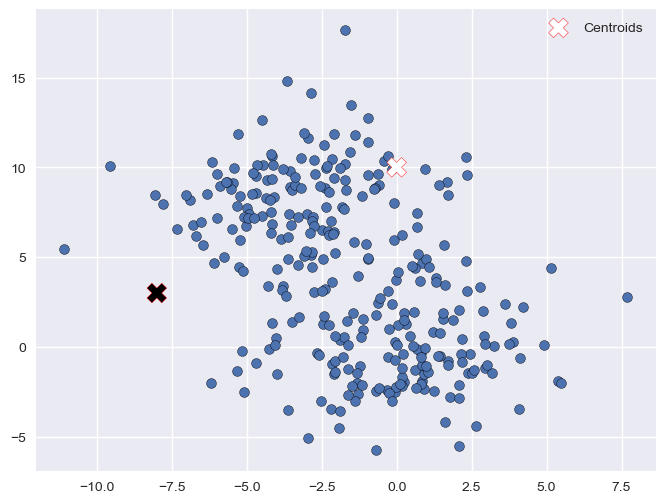

In [ ]:
clusters = np.array([[0,10],[-8,3]])
#clusters = np.array([[80,2.5],[50,3.5]])

# Plot the initial state
plt.figure(figsize=(8, 6))
#labels = kmeans.fit_predict(data)
labels = ((data.reshape(len(data),1,2) - clusters.reshape(1,2,2))**2).sum(-1).argmin(-1)
plt.scatter(data[:, 0], data[:, 1], edgecolors='k', s=50)
plt.scatter(clusters[:, 0], clusters[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')
plt.legend()
plt.show()

**Assignment (1)**

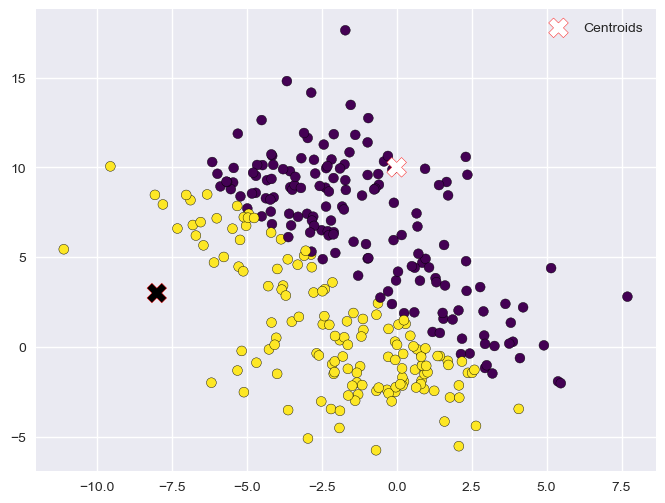

In [ ]:
#clusters = np.array([[0,10],[-8,3]])

# Plot the initial state
plt.figure(figsize=(8, 6))
#labels = kmeans.fit_predict(data)
labels = ((data.reshape(len(data),1,2) - clusters.reshape(1,2,2))**2).sum(-1).argmin(-1)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(clusters[:, 0], clusters[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')
plt.legend()
plt.show()

**Update (1)**

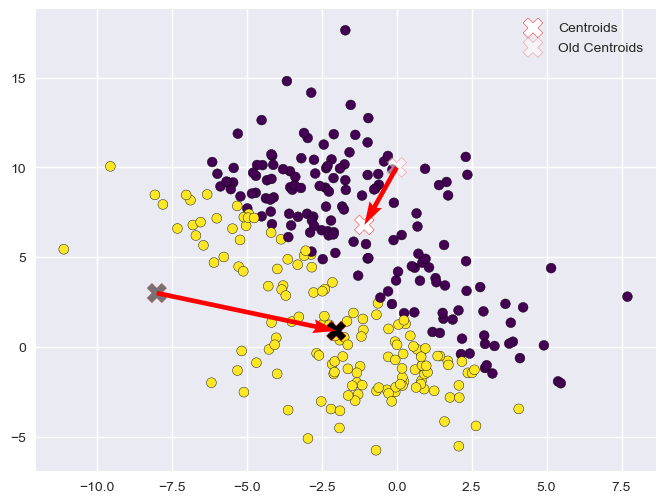

In [ ]:
# Plot the initial state
old_clusters = clusters

plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, n_init=1, init=clusters, max_iter=1, random_state=42)
#labels = 
kmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')

dx, dy = old_clusters[:,0] - kmeans.cluster_centers_[:, 0], old_clusters[:,1] - kmeans.cluster_centers_[:, 1]
plt.scatter(old_clusters[:, 0], old_clusters[:, 1], marker='X', s=200, c=[0,1], label='Old Centroids', edgecolors='r', alpha=0.5)
plt.quiver(old_clusters[:,0], old_clusters[:,1],-dx, -dy, color='r', angles='xy', scale_units='xy', scale=1)

plt.legend()
plt.show()

**Assignment (2)**

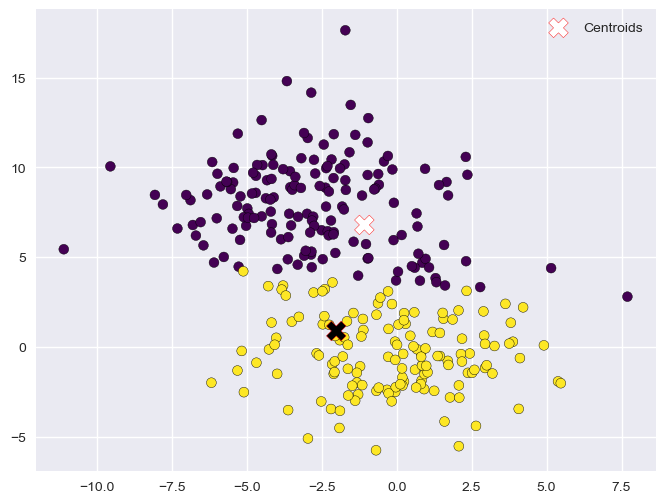

In [ ]:
clusters = np.array([[0,10],[-8,3]])

# Plot the initial state
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, n_init=1, init=clusters, max_iter=1, random_state=42)
labels = kmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')
plt.legend()
plt.show()

**Update (2)**

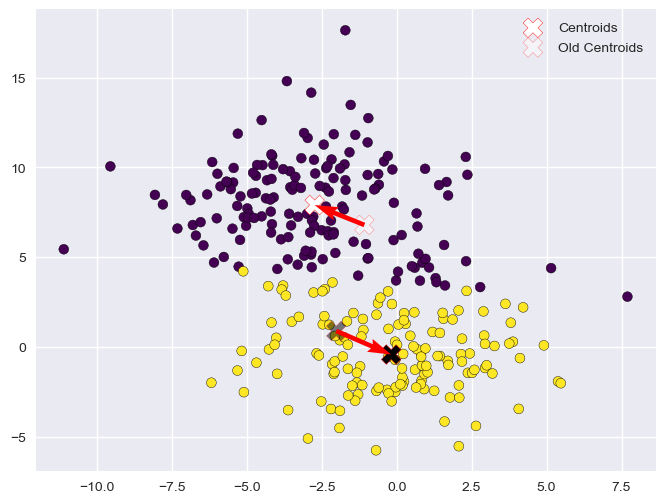

In [ ]:
# Plot the initial state
old_clusters = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, n_init=1, init=clusters, max_iter=2, random_state=42)
#labels = 
kmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')

dx, dy = old_clusters[:,0] - kmeans.cluster_centers_[:, 0], old_clusters[:,1] - kmeans.cluster_centers_[:, 1]
plt.scatter(old_clusters[:, 0], old_clusters[:, 1], marker='X', s=200, c=[0,1], label='Old Centroids', edgecolors='r', alpha=0.5)
plt.quiver(old_clusters[:,0], old_clusters[:,1],-dx, -dy, color='r', angles='xy', scale_units='xy', scale=1)


plt.legend()
plt.show()

**Assignment (3)**

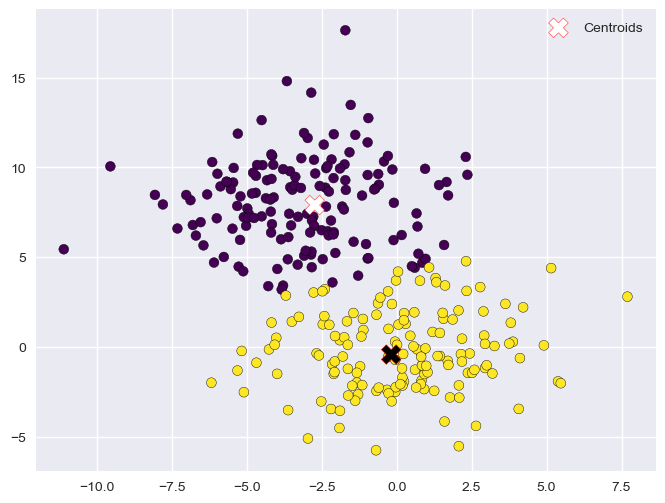

In [ ]:
# Plot the initial state
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, n_init=1, init=clusters, max_iter=2, random_state=42)
labels = kmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')
plt.legend()
plt.show()

**Update (3)**

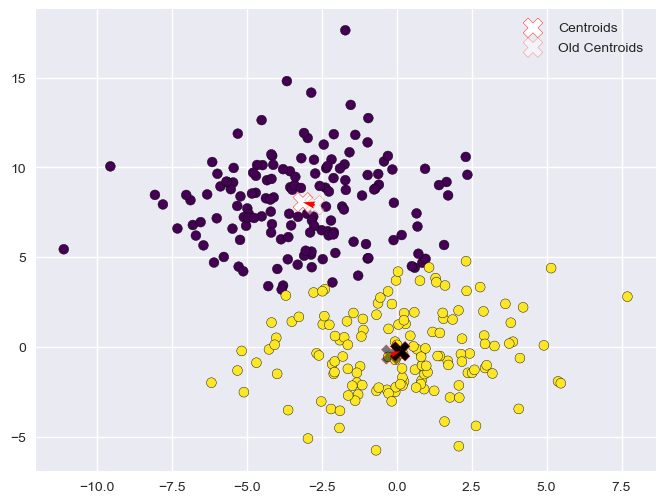

In [ ]:
# Plot the initial state
old_clusters = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, n_init=1, init=clusters, max_iter=3, random_state=42)
#labels = 
kmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')

dx, dy = old_clusters[:,0] - kmeans.cluster_centers_[:, 0], old_clusters[:,1] - kmeans.cluster_centers_[:, 1]
plt.scatter(old_clusters[:, 0], old_clusters[:, 1], marker='X', s=200, c=[0,1], label='Old Centroids', edgecolors='r', alpha=0.5)
plt.quiver(old_clusters[:,0], old_clusters[:,1],-dx, -dy, color='r', angles='xy', scale_units='xy', scale=1)

plt.legend()
plt.show()

**Assignment (4)**

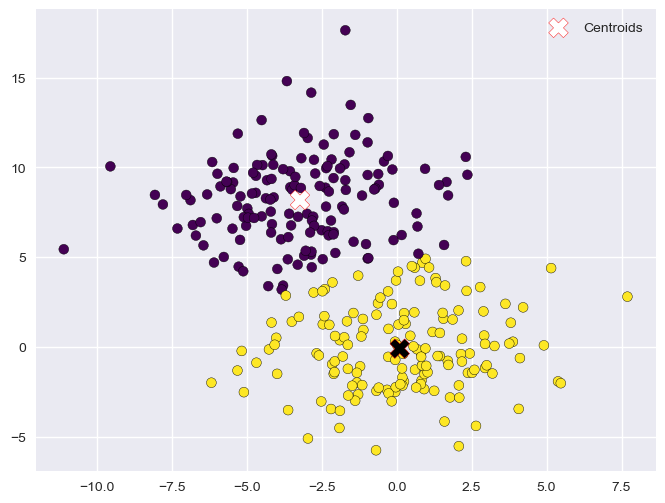

In [ ]:
# Plot the initial state
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, n_init=1, init=clusters, max_iter=4, random_state=42)
labels = kmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')
plt.legend()
plt.show()

**Update (4)**

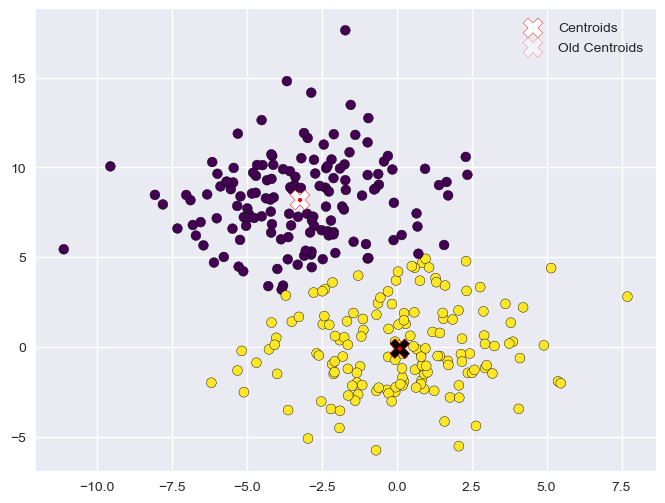

In [ ]:
# Plot the initial state
old_clusters = kmeans.cluster_centers_
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, n_init=1, init=clusters, max_iter=4, random_state=42)
#labels = 
kmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c=[0,1], label='Centroids', edgecolors='r')

dx, dy = old_clusters[:,0] - kmeans.cluster_centers_[:, 0], old_clusters[:,1] - kmeans.cluster_centers_[:, 1]
plt.scatter(old_clusters[:, 0], old_clusters[:, 1], marker='X', s=200, c=[0,1], label='Old Centroids', edgecolors='r', alpha=0.5)
plt.quiver(old_clusters[:,0], old_clusters[:,1],-dx, -dy, color='r', angles='xy', scale_units='xy', scale=1)

plt.legend()
plt.show()

The optimization procedure terminates here as the centroids did not move in the last update step. The data is now clustered in two groups.

The plot below shows the value of the cost function at the end of each iteration:

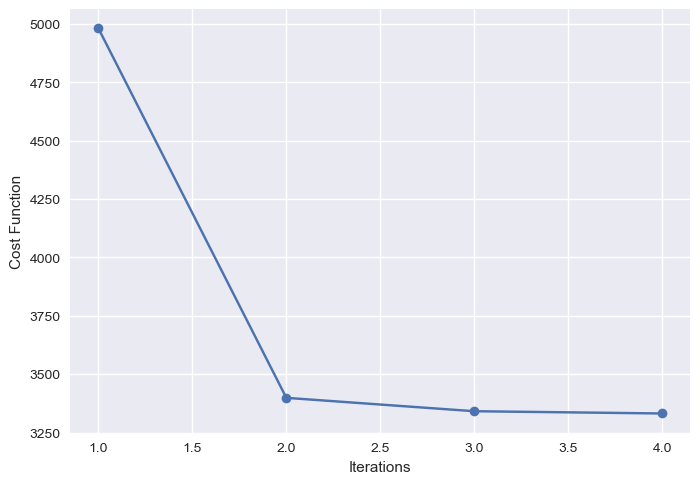

In [ ]:
cost = []
for i in range(1,5):
    kmeans = KMeans(n_clusters=2, n_init=1, init=clusters, max_iter=i, random_state=42)
    kmeans.fit(data)
    cost.append(kmeans.inertia_)
plt.plot(range(1,5),cost,'-o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

### Choosing the Right Value for K
In the K-Means clustering algorithm, $K$ is a **hyper-parameter**. This means that **it is a parameter of the method affecting the final model we obtain after the optimization procedure**, but **its value is not automatically determined by the optimization procedure**.

One common approach to determine the values of hyper-parameters is to make some guesses and fit different models with the guessed values of the hyper-parameters. We can then choose the model which has the "best value" of the considered hyper-parameters.

When it turns to determining the optimal $K$ value for K-Means clustering, there are two main techniques which are commonly used: **the elbow method** and **the silhouette method**, which are discussed in the following.

Note that these are both **heuristic methods not giving many guarantees on the final selection of $K$**, but they can still help decide on the number of clusters, in particular if guided by an intuition of what a good value of $K$ would look like.

##### Elbow Method

The elbow method consists in fitting K-Means models for different values of $K$. For each $K$, we then plot the final value of the cost function. We expect that **as $K$ increases, the cost will decrease**. Indeed, if $K$ is very large (even larger than it should be), we will anyway get a smaller cost due to the fact that the presence of more clusters will inevitably lower their individual variances.

However, we expect the cost function to **slow the speed of decrease in the presence of the optimal (or a good) $K$**. This is called the "elbow point" as the curve should look like an elbow. We can see it in the example below:

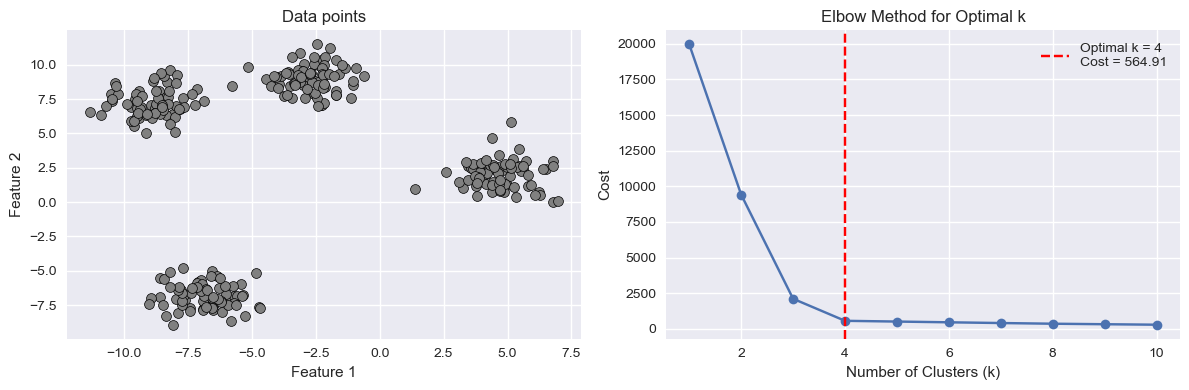

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Function to compute K-means cost (inertia) for a given model and data
def compute_kmeans_cost(model, data):
    return model.inertia_

# Range of k values to test
k_values = range(1, 11)
costs = []

# Compute K-means cost for each k
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(X)
    
    cost = compute_kmeans_cost(kmeans_model, X)
    costs.append(cost)

# Find the optimal number of clusters using the elbow method
optimal_k = 4
optimal_cost = costs[optimal_k - 1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the data on the left
axs[0].scatter(X[:, 0], X[:, 1], c='gray', marker='o', edgecolors='k', s=50, linewidth=0.5)
axs[0].set_title('Data points')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot the elbow curve on the right
axs[1].plot(k_values, costs, marker='o')
axs[1].set_title('Elbow Method for Optimal k')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Cost')

# Highlight the optimal number of clusters
axs[1].axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}\nCost = {optimal_cost:.2f}')
axs[1].legend()

plt.tight_layout()
plt.show()


### Silhouette Method

The silhouette method tries to assess how good a given clustering model is by measuring **how well the data is grouped in the identified clusters**. This is done by computing, **for each data point** a score indicating whether **how well the data point fits the assigned cluster with respect to all others**.

If the model is a good one (hence a good $K$ value), we would expect each data point to fit well its assigned cluster and not to fit well any other cluster. If this does not happen, it means that the clusters are not very well separated and we **either have more or less clusters**.

To do so, for a given data point $i$ assigned to cluster $C_I$, the silhouette method computes the following score:

$$a(i) = \frac{1}{|C_I|-1} \sum_{j \in C_i, i \neq j} d(i,j)$$

where $d(i,j)$ is the Euclidean distance between data point $i$ and data point $j$. In practice, the score $a(i)$ is the **average distance of data point $i$ with any other data point assigned to the same cluster**. We expect this number to be small if the cluster has a low variance.

We now want to compare this number to the value we would have **if $i$ were to be assigned to another cluster $C_J$**. In particular, we will choose the cluster $C_J$ which minimizes the average distance. This is done by computing the following score:

$$b(i) = \min_{J \neq I} \frac{1}{|C_J|} \sum_{j \in C_J} d(i,j)$$

Now we compare $a(i)$ with $b(i)$. Ideally, $a(i)$ should be much smaller than $b(i)$. If this happens, this means that the data point $i$ fits in the cluster $C_I$ much better than it would in any other cluster. To do so, we compute the **silhouette score** of data point $i$ as follows:

$$s(i) = \begin{cases}\frac{b(i)-a(i)}{\max\{a(i),b(i)\}} & \text{ if } |C_I|>1\\0 & \text{ otherwise}\end{cases}$$

The obtained score is such that:

$$-1 \leq s(i) \leq 1$$

In practice:
* A value of $s(i)$ close to $1$ is obtained when $a(i) << b(i)$, meaning that $i$ fits in $C_I$ much better than it would fit in any other cluster;
* A value of $s(i)$ close to $-1$ is obtained when $a(i) >> b(i)$, meaning that another cluster $C_J$ exists in which $a(i)$ fits better.
* A value of $s(i)$ close to $0$ indicates that the data point is close to the **border between two natural clusters**.

The score above is arbitrarily set to $0$ if $|C_I|=1$ as, in that case, the cluster would only contain the data point $i$. Note that this is **an assumption of neutrality**.

The correct number of clusters is usually chosen by showing the silhouette plot, which displays all the silhouette scores of data points within each clusters, arranged from largest to smallest. The plots below are taken from the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) and show examples of silhouette plots for different choices of $K$ in an example dataset:

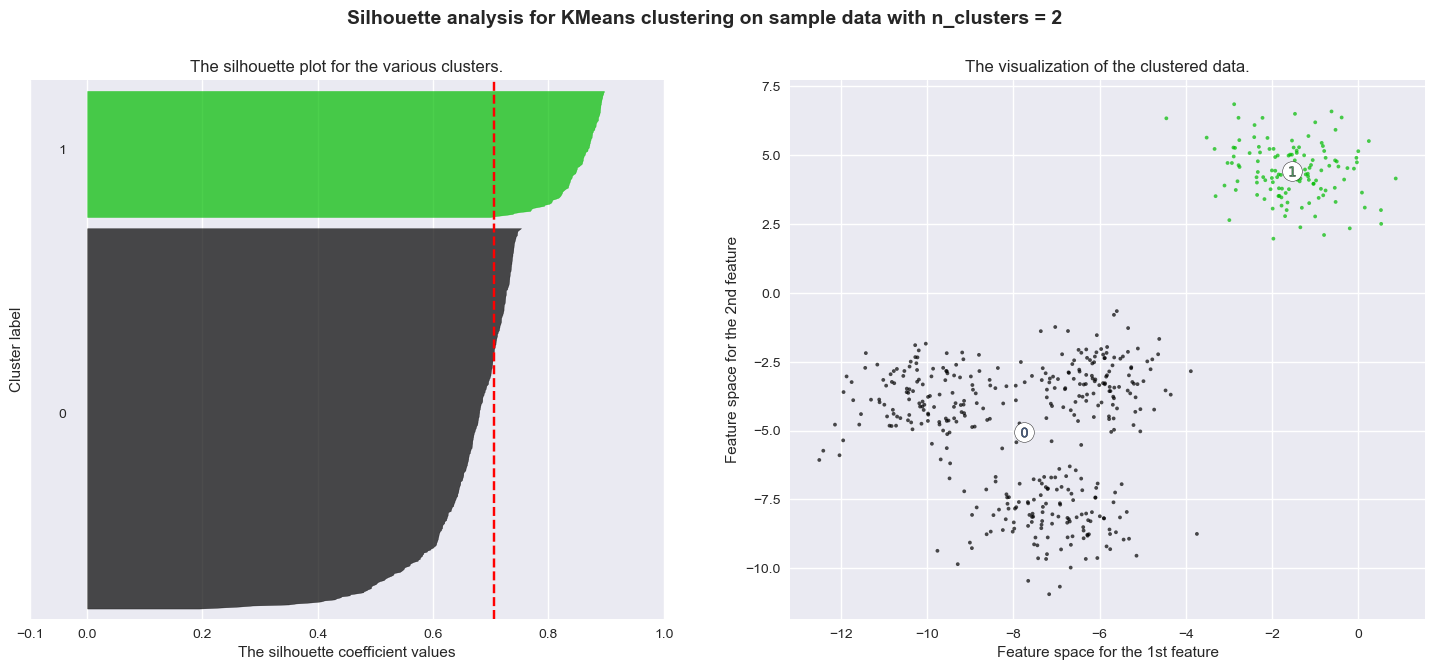

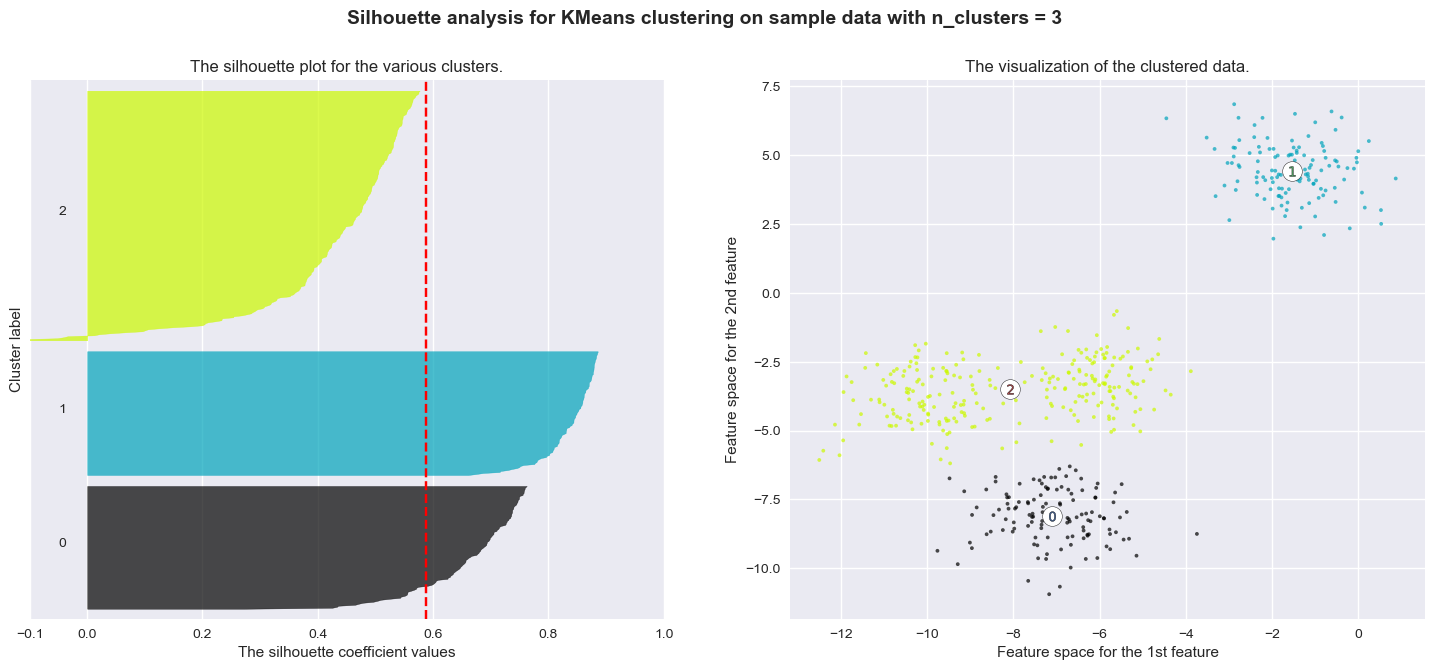

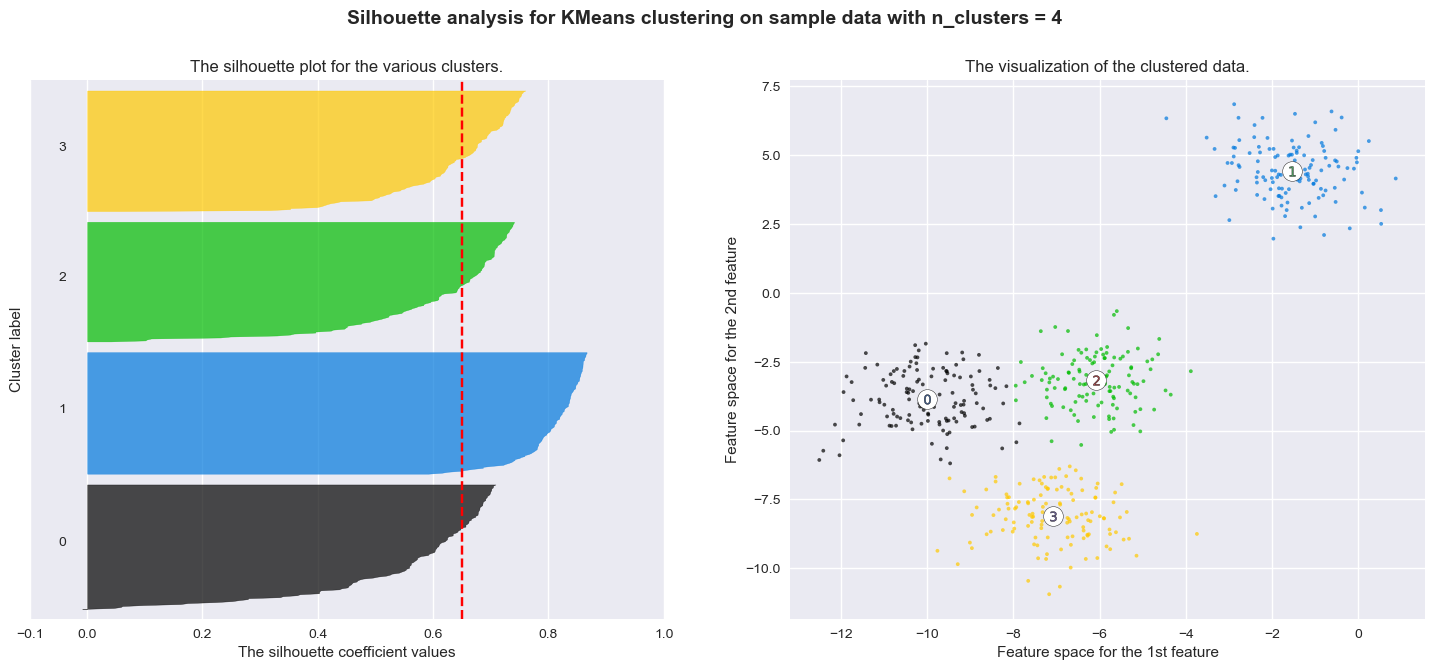

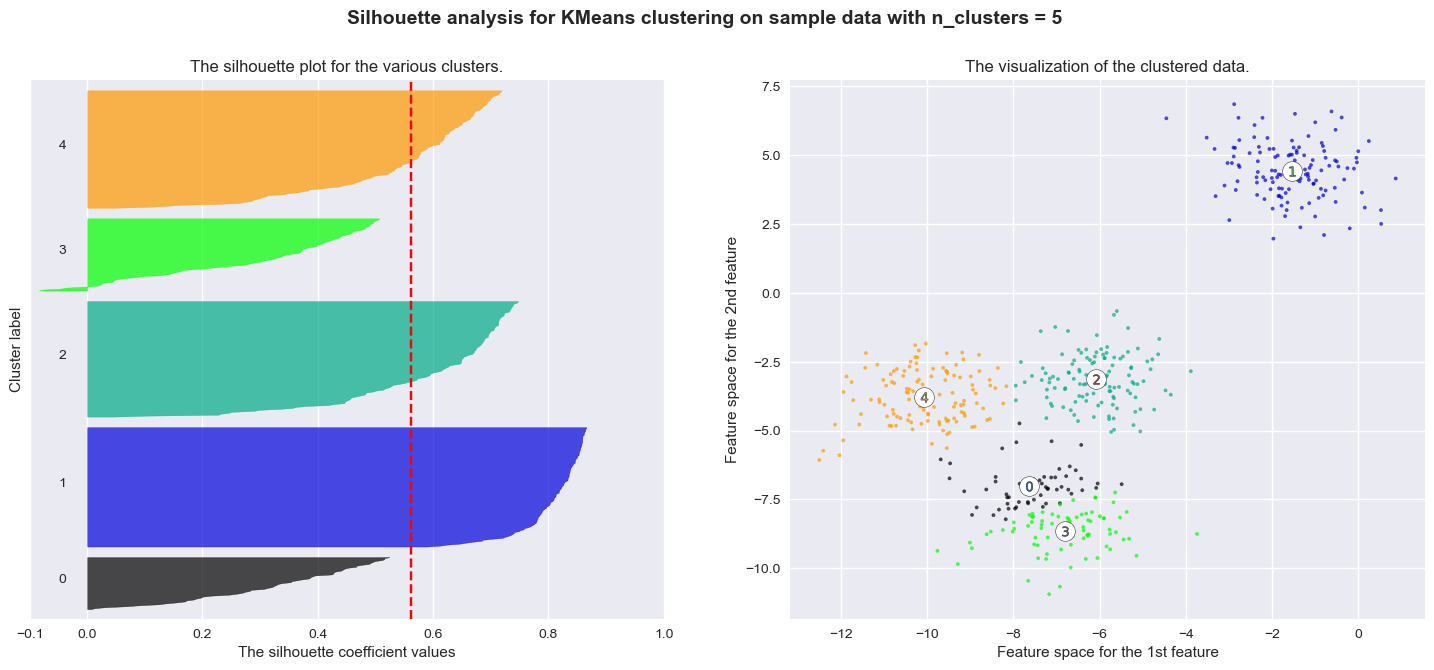

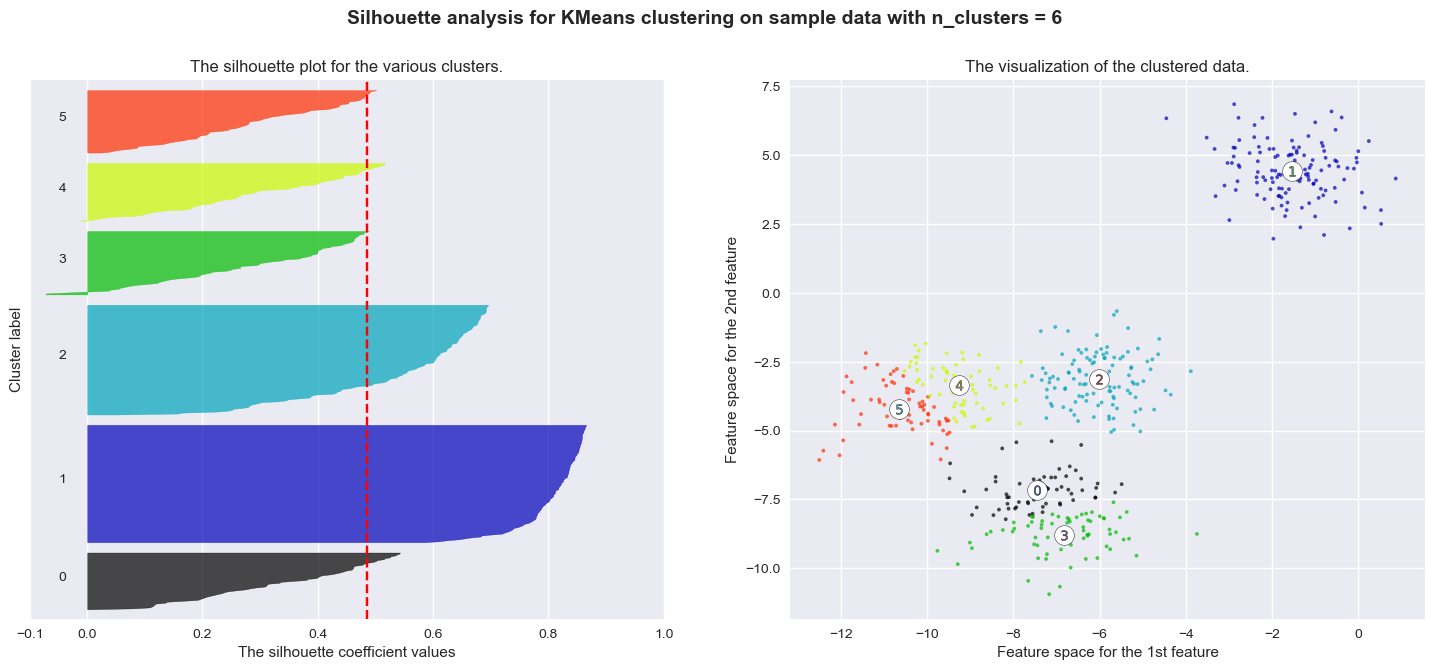

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

silhouettes = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    # print(
    #     "For n_clusters =",
    #     n_clusters,
    #     "The average silhouette_score is :",
    #     silhouette_avg,
    # )

    silhouettes.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The vertical line in red displays the average silhouette score. Good choices of cluster numbers will have silhouette plots which achieve values similar to each other and close to the average one. For example $n=2$ and $n=4$ seem to be the best ones.

In practice, it is also useful to plot the average silhouette score versus the number of clusters and choose value of $K$ which **maximizes** the average score. 

Such plot would be as follows for the previous example:

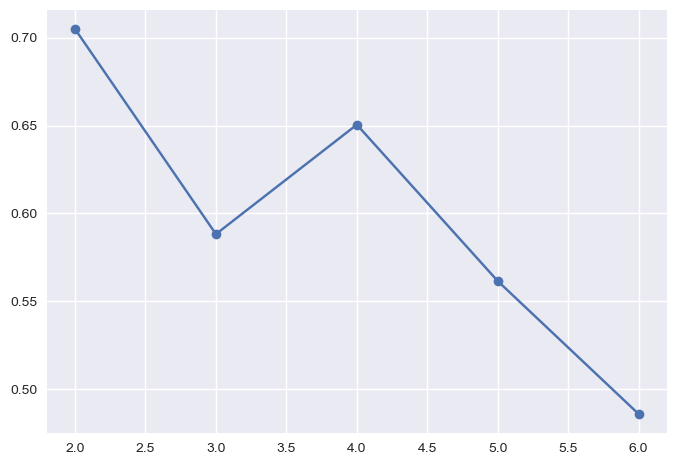

In [ ]:
plt.plot(range_n_clusters,silhouettes, '-o')
plt.show()

The plot below shows another example of such plot for a different dataset:

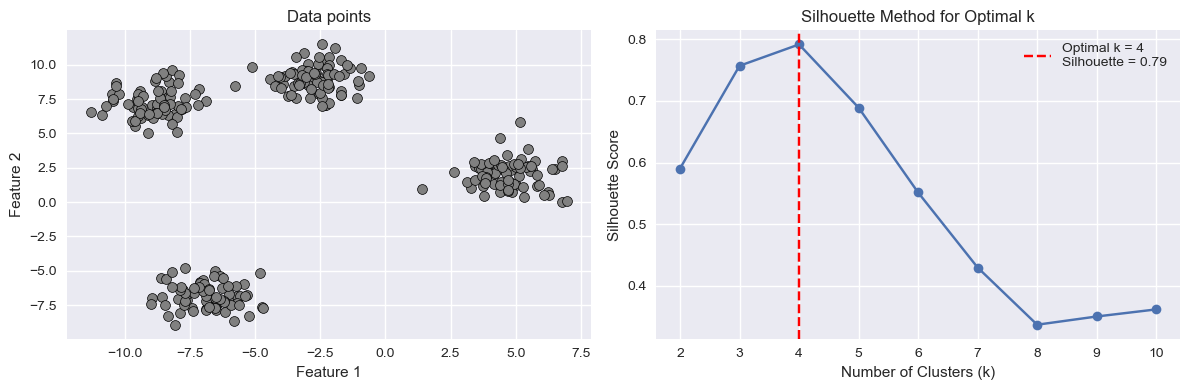

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Function to compute K-means silhouette score for a given model and data
def compute_kmeans_silhouette(model, data):
    labels = model.predict(data)
    return silhouette_score(data, labels)

# Range of k values to test
k_values = range(2, 11)
silhouette_scores = []

# Compute silhouette score for each k
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(X)
    
    silhouette = compute_kmeans_silhouette(kmeans_model, X)
    silhouette_scores.append(silhouette)

# Find the optimal number of clusters using the silhouette method
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
optimal_silhouette = np.max(silhouette_scores)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the data on the left
axs[0].scatter(X[:, 0], X[:, 1], c='gray', marker='o', edgecolors='k', s=50, linewidth=0.5)
axs[0].set_title('Data points')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot silhouette scores on the right
axs[1].plot(k_values, silhouette_scores, marker='o')
axs[1].set_title('Silhouette Method for Optimal k')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Silhouette Score')

# Highlight the optimal number of clusters
axs[1].axvline(x=optimal_k_silhouette, color='red', linestyle='--', label=f'Optimal k = {optimal_k_silhouette}\nSilhouette = {optimal_silhouette:.2f}')
axs[1].legend()

plt.tight_layout()
plt.show()


## Other Clustering Algorithms

It is important to note that various clustering algorithms exist beyond the commonly discussed k-means method. While k-means is a popular and widely used algorithm for partitioning data into distinct groups based on similarity, it is one approach among many. Numerous other clustering algorithms offer different perspectives and address specific challenges. Some examples include **hierarchical clustering**, **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise), and **spectral clustering**. These alternatives provide unique strengths and are tailored to different types of data and scenarios. While our focus has been on understanding clustering in general and the k-means algorithm in particular, it is important to know that other approaches may be more suitable depending on the specific problem at hand. In the next lectures, we will see **Gaussian Mixture Models (GMMs)**, a probabilistic model for density estimation which can also be interpreted as a clustering algorithm.

## Lab: K-Means Clustering for Customer Segmentation

In this lab, we will apply the K-Means algorithm to a classic, real-world business problem: **Customer Segmentation**.

### The Goal
Our goal is to use K-Means to "discover" natural groups within a mall's customer base. We'll use a dataset of mall customers and their `Annual Income` and `Spending Score`.

By finding these clusters, a marketing team could create targeted campaigns. For example, a "high income, low spending" group needs a different message than a "low income, high spending" group.

### The Workflow
1.  Load and explore the data (using a `pairplot` to spot relationships).
2.  **Prepare the data:** Select our features and, most importantly, **scale them**.
3.  **Find the best $K$:** Use both the **Elbow Method** and the **Silhouette Method** to determine the optimal number of clusters.
4.  **Fit the final model:** Train our final K-Means model with the best $K$.
5.  **Visualize and Interpret:** Plot the final clusters and, most importantly, *interpret what they mean* from a business perspective.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the tools for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

### Step 1: Load and Explore the Data

We'll load the "Mall Customers" dataset from a public URL. This dataset is perfect for clustering.

In [11]:
# Load the dataset
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv"
df = pd.read_csv(url)

# Rename columns for easier access
df = df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

print(df.head())
print("\n--- Data Info ---")
df.info()

   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Let's use `seaborn.pairplot` to visualize all the relationships. Pay close attention to the `Income` vs. `SpendingScore` plot.

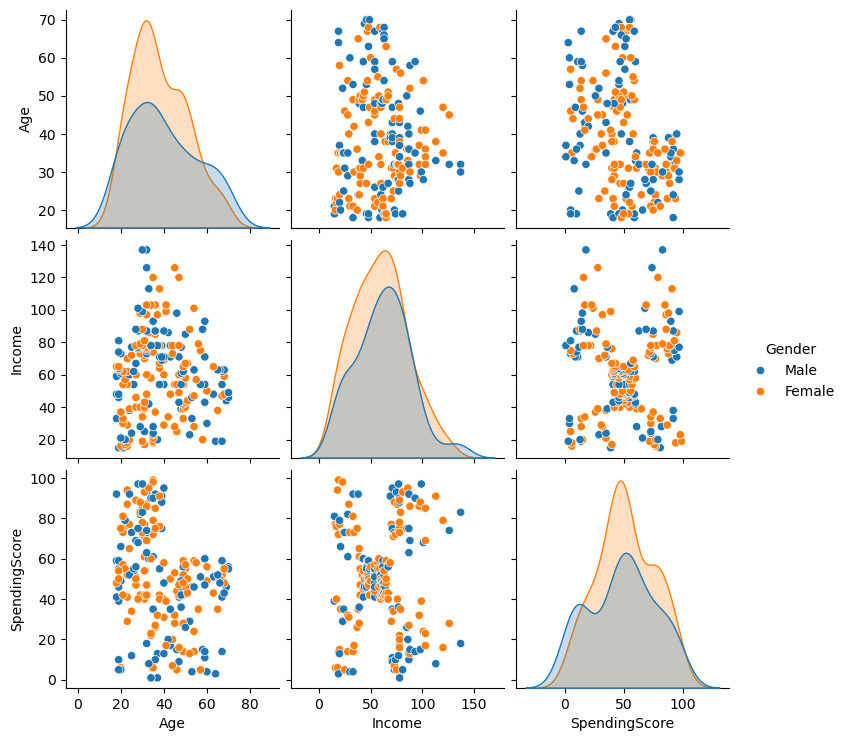

In [12]:
# We'll drop CustomerID and make 'Gender' a color
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', diag_kind='kde')
plt.show()

### Step 2: Prepare and Scale the Data

The `pairplot` confirms our hypothesis: the **`Income` vs. `SpendingScore`** plot shows at least 5 distinct, non-linear groups of customers.

We will focus our clustering on just these two features.

**Crucially,** `Income` (15-137) and `SpendingScore` (1-99) are on different scales. K-Means uses Euclidean distance, so if we don't scale, the `Income` feature will completely dominate the `SpendingScore`. We **must** use `StandardScaler`.

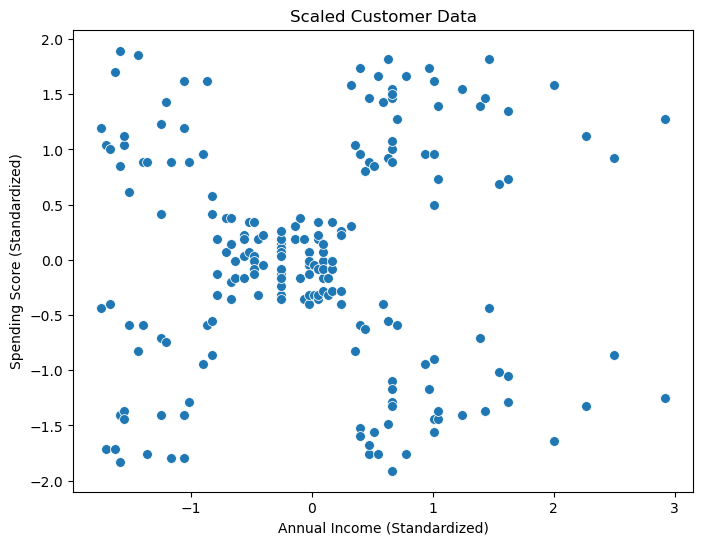

In [13]:
# 1. Select the features for clustering
X = df[['Income', 'SpendingScore']].values

# 2. Initialize the scaler
scaler = StandardScaler()

# 3. Fit the scaler and transform the data
X_scaled = scaler.fit_transform(X)

# Let's plot the scaled data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], s=50)
plt.title('Scaled Customer Data')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.show()

### Step 3: Find the Best K with the Elbow Method

Now we'll use the **Elbow Method**. We will run K-Means for $K=1$ through $K=10$ and plot the **Inertia** (the $J$ cost function, or WCSS). We are looking for the "elbow" where the decrease in cost dramatically slows down.

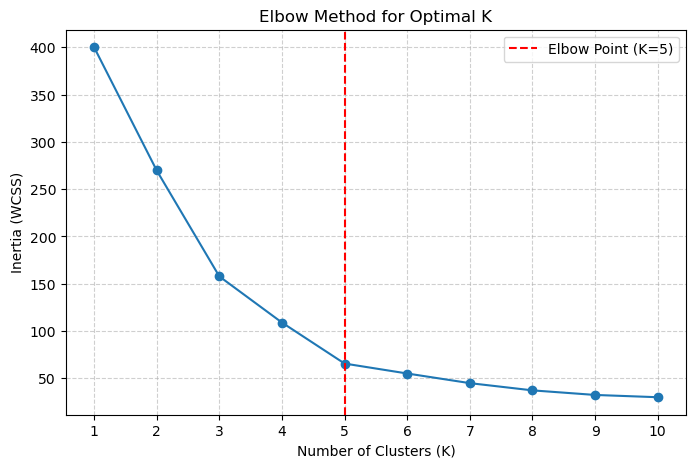

In [15]:
# We'll use the scaled data from now on
k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_) # .inertia_ is the WCSS (our cost function J)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'o-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight the "elbow"
plt.axvline(x=5, color='red', linestyle='--', label='Elbow Point (K=5)')
plt.legend()
plt.show()

The elbow shows a clear "bend" appearing at **$K=5$**. The drop in inertia from 5 to 6 is much smaller than the drop from 4 to 5.

Let's confirm this with the **Silhouette Method**.

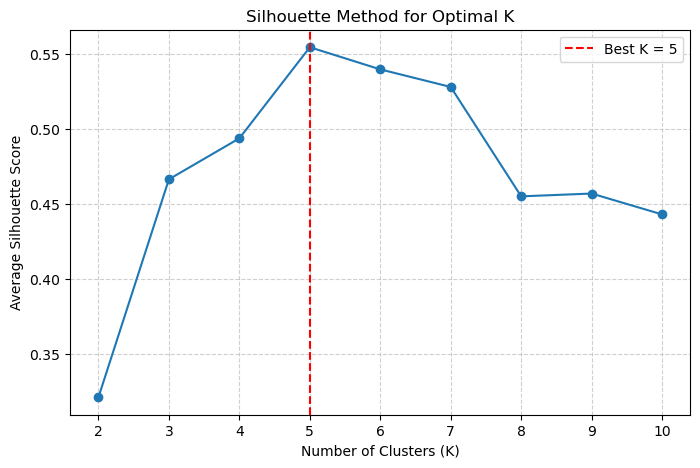

In [16]:
# We must start from K=2
k_values_sil = range(2, 11)
silhouette_scores = []

for k in k_values_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    # Calculate the average silhouette score
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values_sil, silhouette_scores, 'o-')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values_sil)
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight the best K
best_k_sil = k_values_sil[np.argmax(silhouette_scores)]
plt.axvline(x=best_k_sil, color='red', linestyle='--', label=f'Best K = {best_k_sil}')
plt.legend()
plt.show()

### Step 4: Fit and Interpret the Final Model

The Silhouette plot confirms it! The highest score (the best cluster separation) is achieved at **$K=5$**.

Both methods agree. We will now build our final model using $K=5$ and, most importantly, **interpret the results**.

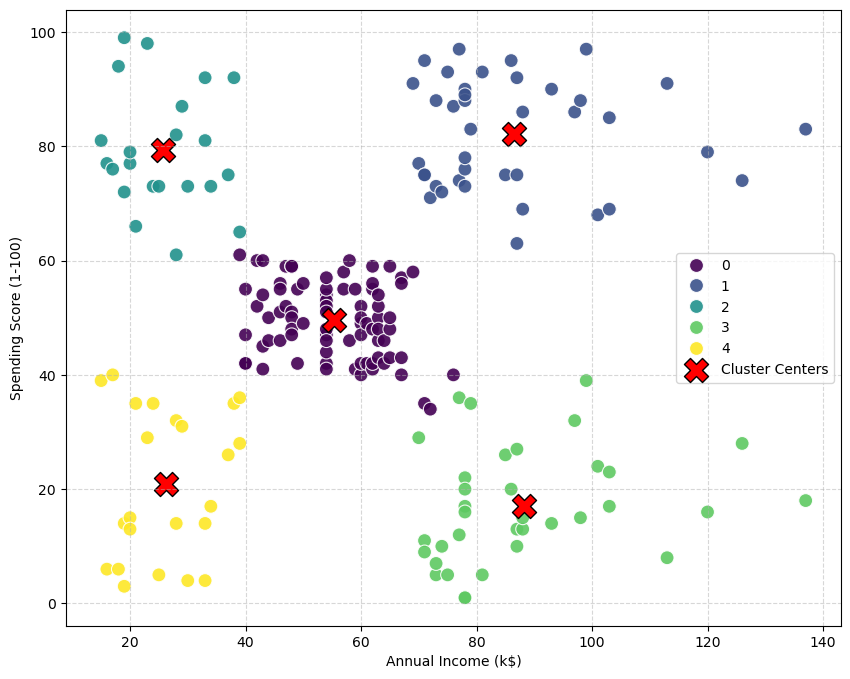

In [75]:
# 1. Fit the final model with K=5
final_kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_scaled)

# 2. Get the cluster centers (on the *scaled* data)
final_centers_scaled = final_kmeans.cluster_centers_

# 3. Add the cluster labels back to our *original* dataframe
df['Cluster'] = final_labels

# 4. Plot the final clustered data (using the *original*, unscaled data)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='SpendingScore', data=df, 
                hue='Cluster', palette='viridis', s=100, alpha=0.9)

# 5. We must "inverse_transform" the centers to plot them on the original scale
final_centers_original = scaler.inverse_transform(final_centers_scaled)

# Plot the cluster centers
plt.scatter(final_centers_original[:, 0], final_centers_original[:, 1], 
            marker='X', s=300, c='red', 
            edgecolor='black', label='Cluster Centers')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Step 5: Business Interpretation

This is the most important step. What do these 5 clusters *mean*? Let's analyze the `Income` vs. `SpendingScore` for each group.

We can use `.groupby()` to see the "average" customer in each cluster.

In [18]:
# Calculate the mean Income and SpendingScore for each cluster
cluster_analysis = df.groupby('Cluster')[['Income', 'SpendingScore']].mean()
print(cluster_analysis)

            Income  SpendingScore
Cluster                          
0        55.296296      49.518519
1        86.538462      82.128205
2        25.727273      79.363636
3        88.200000      17.114286
4        26.304348      20.913043


### Analysis of Segments

By looking at the plot and the table, we can give each cluster a clear, descriptive name:

* **Cluster 0: "The Standard"**
    * *Profile:* Average Income, Average Spending Score.
    * *Interpretation:* This is the large, "normal" group of customers.

* **Cluster 1: "The Targets" (or "VIPs")**
    * *Profile:* High Income, High Spending Score.
    * *Interpretation:* The ideal customer. They have money and they love to spend it.

* **Cluster 2: "The Risk" (or "Careless")**
    * *Profile:* Low Income, High Spending Score.
    * *Interpretation:* Spend a lot, but have low income. (e.g., college students).

* **Cluster 3: "The Careful Rich"**
    * *Profile:* High Income, Low Spending Score.
    * *Interpretation:* They have money, but don't spend it. A key group to target with different marketing.

* **Cluster 4: "The Savers"**
    * *Profile:* Low Income, Low Spending Score.
    * *Interpretation:* Cautious customers who don't spend much.

**Conclusion:** K-Means successfully partitioned the data into five distinct, meaningful groups that a business could now build specific marketing strategies for.

### Going Further: Clustering in 3D (Age, Income, Spending)

The 2D visualization on `Income` and `SpendingScore` was a perfect way to understand *how* K-Means works. But in a real scenario, we'd want to use *all* the relevant information we have.

Let's try to cluster these customers again, but this time using **three** features:
* `Age`
* `Income`
* `SpendingScore`

#### The New Challenge: Preprocessing and Visualization
1.  **Preprocessing:** All three features (`Age`, `Income`, `SpendingScore`) are on different scales. We **must** use `StandardScaler` on all of them.
2.  **Visualization:** We can no longer use a simple 2D scatter plot. We will have to use a **3D scatter plot** to see our clusters.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Select the features for clustering
X_3D = df[['Age', 'Income', 'SpendingScore']].values

# 2. Initialize the scaler
scaler_3D = StandardScaler()

# 3. Fit the scaler and transform the data
X_scaled_3D = scaler_3D.fit_transform(X_3D)

print(f"New processed data shape: {X_scaled_3D.shape}")

New processed data shape: (200, 3)


### Step 3: Find the Best $K$ (Again)

Now that we have our new, 3-dimensional `X_scaled_3D` data, we must re-run our Elbow and Silhouette methods to find the best $K$ *for this new feature space*.

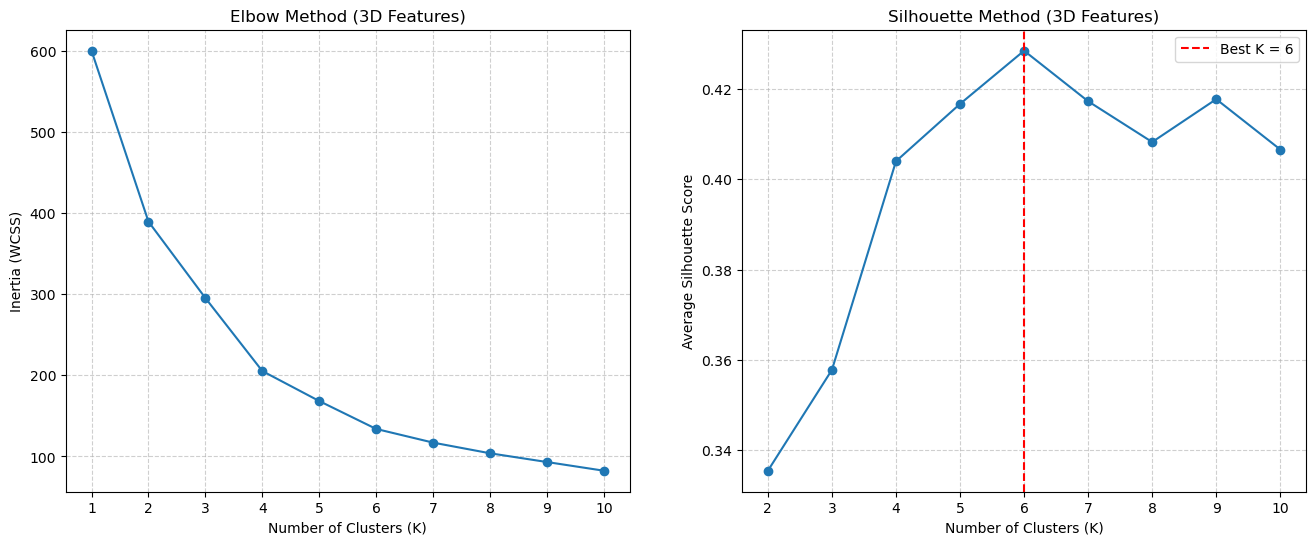

In [35]:
# --- 1. Elbow Method (on 3D data) ---
k_values = range(1, 11)
inertias_3D = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_3D)
    inertias_3D.append(kmeans.inertia_)

# --- 2. Silhouette Method (on 3D data) ---
k_values_sil = range(2, 11)
silhouette_scores_3D = []
for k in k_values_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_3D)
    score = silhouette_score(X_scaled_3D, labels)
    silhouette_scores_3D.append(score)

# --- 3. Plot the results ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Elbow plot
ax1.plot(k_values, inertias_3D, 'o-')
ax1.set_title('Elbow Method (3D Features)')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia (WCSS)')
ax1.set_xticks(k_values)
ax1.grid(True, linestyle='--', alpha=0.6)

# Silhouette plot
ax2.plot(k_values_sil, silhouette_scores_3D, 'o-')
ax2.set_title('Silhouette Method (3D Features)')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Average Silhouette Score')
ax2.set_xticks(k_values_sil)
ax2.grid(True, linestyle='--', alpha=0.6)

# Highlight the best K
best_k_sil_3D = k_values_sil[np.argmax(silhouette_scores_3D)]
ax2.axvline(x=best_k_sil_3D, color='red', linestyle='--', label=f'Best K = {best_k_sil_3D}')
ax2.legend()

plt.show()

### Step 4: Final Model & Interpretation

The Elbow method is again a bit ambiguous (maybe $K=5$ or $K=6$?), but the Silhouette plot often shows a clearer peak. Let's assume for this run the best score was at **$K=6$**.

Now, how do we interpret these 6 clusters? We can't use a 2D plot.

The solution is to:
1.  **Visualize** the clusters with a **3D scatter plot**.
2.  **Analyze** the "profile" of each cluster using `groupby()`.

In [36]:
# 1. Fit the final model with the best K (e.g., K=6)
best_k = 6
final_kmeans_3D = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels_3D = final_kmeans_3D.fit_predict(X_scaled_3D)

# 2. Add the new cluster labels back to the ORIGINAL DataFrame
df['Cluster_3D'] = final_labels_3D

# 3. Analyze the cluster profiles using groupby()
# We can now see the average 'Age', 'Income', etc. for each new cluster
cluster_analysis_3D = df.groupby('Cluster_3D')[['Age', 'Income', 'SpendingScore']].mean()
print("--- Average Cluster Profiles (3D Features) ---")
print(cluster_analysis_3D.sort_values(by='Income'))

--- Average Cluster Profiles (3D Features) ---
                  Age     Income  SpendingScore
Cluster_3D                                     
4           25.000000  25.260870      77.608696
5           45.523810  26.285714      19.380952
0           56.333333  54.266667      49.066667
1           26.794872  57.102564      48.128205
3           32.692308  86.538462      82.128205
2           41.939394  88.939394      16.969697


### Visualizing the 3D Clusters

Now for the best part. We can use `matplotlib`'s 3D plotting tools to see the clusters in our new 3D feature space.

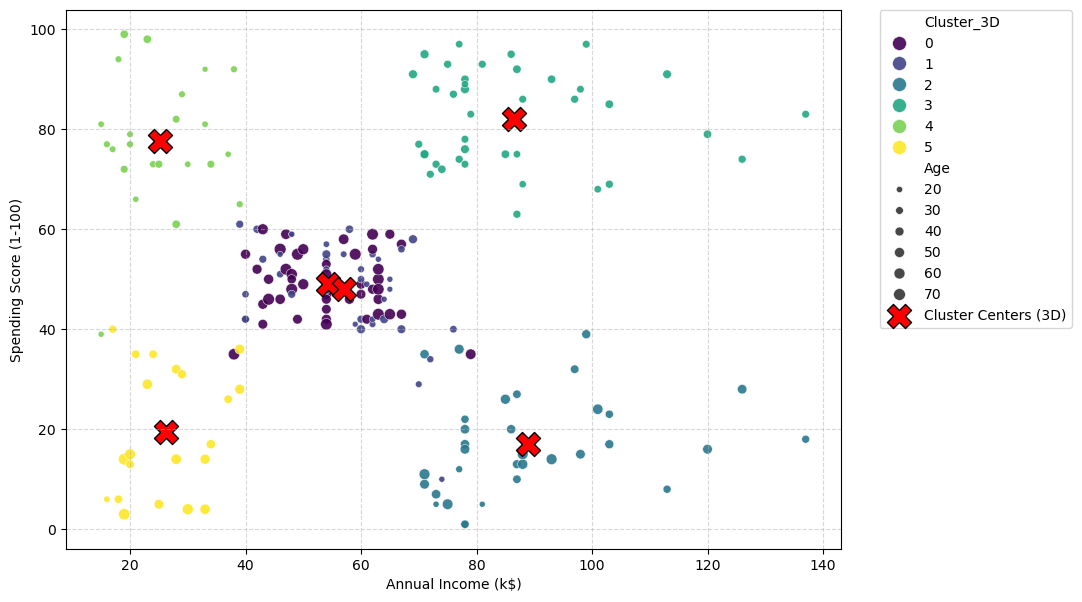

In [71]:

plt.figure(figsize=(10, 7)) # Increased figure size slightly for the legend

# Create the "4D" scatter plot
sns.scatterplot(
    data=df,
    x='Income',
    y='SpendingScore',
    hue='Cluster_3D',  # Color by cluster (categorical)
    size='Age',        # Vary dot size by Age (continuous)
    palette='viridis', # Using viridis to match the 3D plot
    alpha=0.9,         # Set alpha to 0.6 to see points overlap
    s=100              # Base size
)

# --- ADDED THIS PART ---
# Plot the cluster centers
# We use the 'Income' (column 1) and 'SpendingScore' (column 2)
# from our 3D centers array
plt.scatter(
    centers_original_3D[:, 1], # x = Income
    centers_original_3D[:, 2], # y = SpendingScore
    marker='X',                # Use a large 'X'
    s=300,                     # Make it big
    c='red',                   # Make it red
    edgecolor='black',         # With a black border
    label='Cluster Centers (3D)' # Add to legend
)
# -----------------------

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Analysis: What the 4D Plot Tells Us

The plot is now more nuanced, and you'll notice the optimal number of clusters has changed from **5** to **6**. This is not a mistake; it is the **key finding** of this 3D analysis.

It demonstrates a fundamental concept: **changing your feature space can change the optimal structure of the data.**

* **The K=5 Model (2D):** This analysis *only* knew about `Income` and `SpendingScore`. In that 2D space, the Silhouette method told us the best way to group the data was into **5 clusters**.
* **The K=6 Model (3D):** This analysis used `Income`, `SpendingScore`, AND `Age`. When we added the `Age` dimension, the "shape" of the data changed. The Silhouette method, when run on this new 3D data, found that **6 clusters** was a better, more distinct grouping.

### Visual Evidence

You can see *why* in the plot.
* In the original K=5 plot, the large **"Standard"** group (blue, Cluster 0) was a single, dense blob in the middle.
* In the new K=6 plot, this *same middle area* has been split into **two new groups**: a dark purple cluster (Cluster 0) and a dark blue cluster (Cluster 1).

The 3D model used the new `Age` feature (which we encode as the **size** of the dots) to discover this new pattern. It realized that the single "Standard" cluster was actually **two different groups** that just happened to overlap in the 2D projection. Based on the dot sizes, the model likely found:

* **Cluster 0 (Purple):** "Standard" customers (average income/spending) who are **Younger** (small dots).
* **Cluster 1 (Blue):** "Standard" customers (average income/spending) who are **Older** (large dots).

This is a much more powerful and useful segmentation, and we only found it by adding more relevant features to our analysis.

Alternative interactive 3D visualization:

In [86]:
import plotly.graph_objects as go
import plotly.express as px

# --- We assume 'df' has the 'Cluster_3D' column ---
# --- and 'centers_original_3D' (unscaled) is in memory ---

# 1. Create the main scatter plot using Plotly Express
# This plots all the individual data points (our customers)
fig = px.scatter_3d(
    df, 
    x='Age', 
    y='Income', 
    z='SpendingScore',
    color='Cluster_3D',  # Color the dots by their cluster
    color_continuous_scale='viridis', # Use the same color map
)

# 2. Add the Cluster Centers as a separate "trace"
# We plot these as large, red 'X' markers
fig.add_trace(go.Scatter3d(
    x=centers_original_3D[:, 0], # Age
    y=centers_original_3D[:, 1], # Income
    z=centers_original_3D[:, 2], # SpendingScore
    mode='markers',
    marker=dict(
        color='red',
        symbol='x',
        size=10,
        line=dict(color='black', width=2)
    ),
    name='Cluster Centers'
))

# 3. Show the interactive plot
fig.show()

## References

-   Section 10.3.1 of \[1\]
-   Section 2.3.9 of \[2\]
-   Section 9.2 of \[2\]
-   https://en.wikipedia.org/wiki/Silhouette_(clustering)

\[1\] James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). [An
introduction to statistical
learning](http://faculty.marshall.usc.edu/gareth-james/ISL/). New York:
springer.

\[2\] Bishop, Christopher M., and Nasser M. Nasrabadi. Pattern recognition and machine learning. Vol. 4. No. 4. New York: springer, 2006.